<a href="https://colab.research.google.com/github/idanHur/Titanic/blob/main/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Idan Hur**



https://www.kaggle.com/idanhur

# **TL;DR**
In this homework i will try to solve the Kaggle contest "Titanic - Machine Learning from Disaster", as the contest name applies we need to categorize the titanic passengers to survivors and victims using Machine Learning.

In this notebook i will:
  1. analayze the data in order to find connections between categories of passengers and their impact on the chances of survival.
  2.Perform ML classification on the data.

Logistic Regression (with SGD Classifier), Ihad chose this modle due to its ability to perform the required binary classification (Survived/Died).

And i will also use Seaborn and Pandas, which allowed me to retrieve data and display it visually.

# Imports

In [ ]:
# Essentials
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px


# Linear Regression
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder

# Configurations
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [ ]:
#load the data with pandas
testCSV = pd.read_csv("test.csv")
trainCSV = pd.read_csv("train.csv") 

In [ ]:
# show the test data
trainCSV

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now i will try to understand the data:

i will get the keys of the data set and i will try to understand what each of them represent.

In [ ]:
trainCSV.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

As we can see our dataset holds 12 keys:

***PassengerId***: Id of passenger.

***Survived***: 1-yes 0-no.

***Pclass***: ticket class, 1-1st class, 2 - 2nd class, 3 - 3rd class.

***Name***: name of the passenger.

***Sex***: sex of the passenger .

***Age***: age of passenger by years.

***Sibsp***: number of siblings / spouses aboard the Titanic.

***Parch***: number of parents / children aboard the Titanic.

***Ticket***: Ticket number.	

***Fare***: Passenger fare.

***Cabin***: Cabin number.

***Embarked***: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton.

Now i will cheack the type of each feature and if there are any missing values:

In [ ]:
trainCSV.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
trainCSV.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

count_empty_values_in_each_column(trainCSV)

empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


As we can see we have missing values in Age, Cabin, Embarked.

so in order to use this features i will have to fill the missing values.


# Changing the dataset
As mentioned above, we have missing data in Age, Cabin and Embarked.

and Name, sex, Ticket, Cabin and Embarked are represented by strings.

so after looking at the data i decided the following:

  featuers i will drop:

  1. **Cabin**: There is just too much data missing about this feature (687 rows).
  2. **PassengerId**: There is no real connection between this feature and the chance of survival, this feature just orders the dataset.
  3. **Ticket**: This feature dosnt hold any data that will help us to predict the chance of survival.
  4. **Name**: The name of the passanger dosnt change his chance of survival (this feature we will delete later on becouse we want to extract the Title name as mentioned later on).   


featuers i will Encode:
  1. **Sex**
  2. **Embarked**
  

**Droping the data:**

In [ ]:
altered_train = trainCSV.copy()
#dropping unnecessary columns
altered_train = altered_train.drop(columns = "Cabin", axis = 1)
altered_train = altered_train.drop(columns = "PassengerId", axis = 1)
altered_train = altered_train.drop(columns = "Ticket", axis = 1)
#show altered dataset
altered_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Now i will fill missing values.

For Embarked i will fill with random values.

For Age becouse there are 177 values missing i will fill with the mean value so i wont "distort" the data.

In [ ]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)


In [ ]:
fill_na_random_pick_column_distribution(altered_train, "Embarked")
fill_na_mean(altered_train, "Age")

In [ ]:
count_empty_values_in_each_column(altered_train)

empty values
------------

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


As we can see now we dont have missing values in any column

Now i will convert our catagorial features (Sex and Embarked) with dummy encoding

In [ ]:
df_cat = altered_train[['Embarked']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=enc.get_feature_names_out())
altered_train = altered_train.drop(['Embarked'], axis=1).join(cat_enc)
altered_train['Sex'] = altered_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
altered_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,0.0,1.0
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0.0,1.0
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,0.0,1.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0.0,1.0
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,0.0,0.0


now, I will cheack the features by heat map for the correlation.

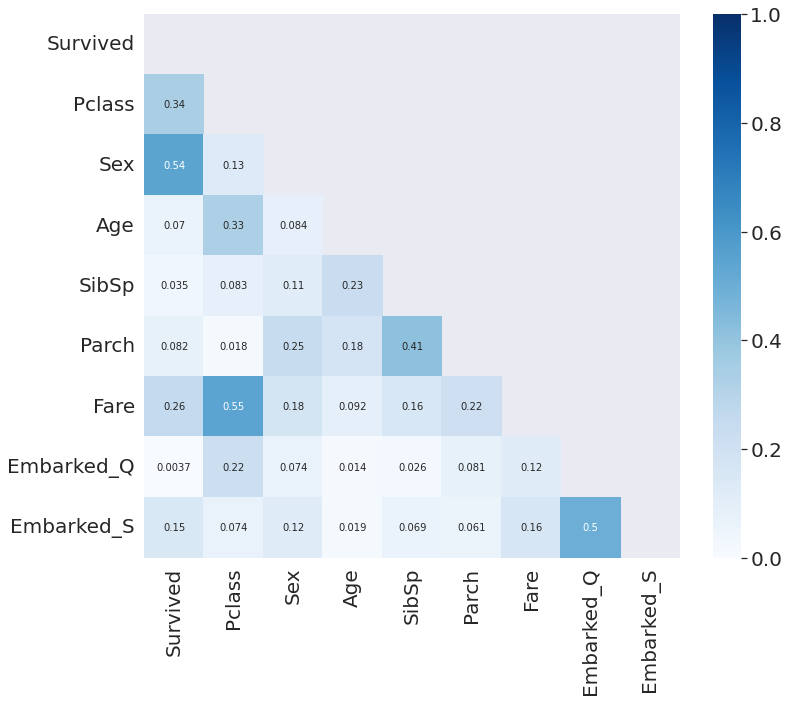

In [ ]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(altered_train.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1, mask = np.triu(cor))
plt.show()

As we can see from the heat map:

Strongest correlation to survived(corr >= 0.3): sex, pclass.

realative strong correlation (corr >= 0.3): Fare-Pclass, Age-Pclass, SibSp-Parch.


lets cheack some of the features realative to survival.

i also want to cheack the union of SibSp and Parch because i dont think there is any real diffrence for the most part between them to survival,

so maybe we can make a new feature called "family" and drop SibSp and Parch. 

also i want to cheack the survival rate by Title name.

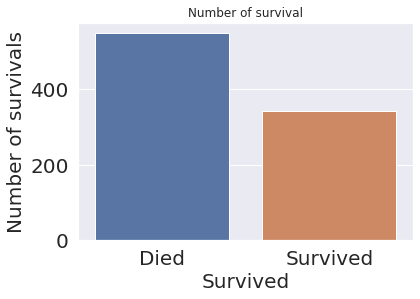

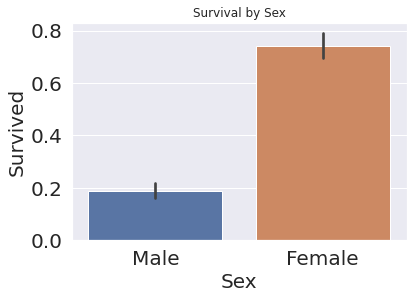

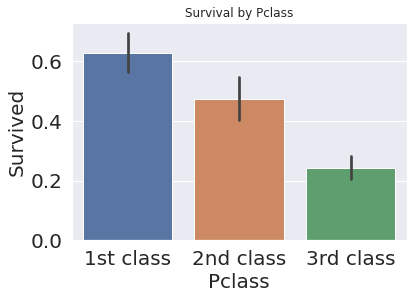

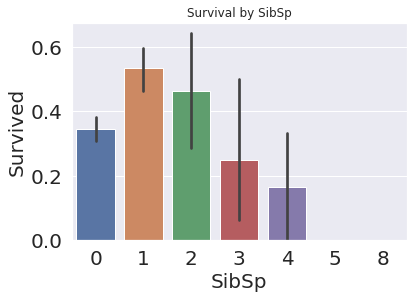

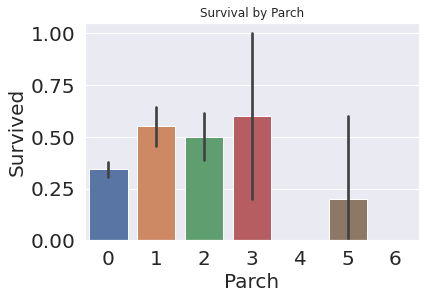

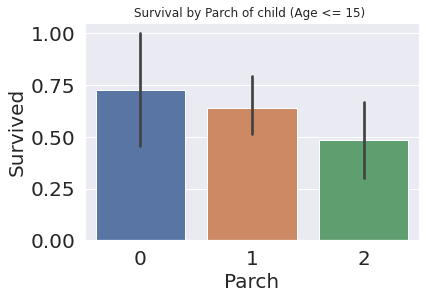

In [ ]:
# Survived
SurvivedBarPlot = sns.barplot(x = "Survived", y = altered_train["Survived"].value_counts(), data = altered_train)
SurvivedBarPlot.set_xticklabels(["Died", "Survived"])
SurvivedBarPlot.set_ylabel("Number of survivals")
plt.title("Number of survival")
plt.show()

# Survived relative to Sex
sexBarPlot = sns.barplot(x = "Sex", y = "Survived", data = altered_train)
sexBarPlot.set_xticklabels(["Male", "Female"])
plt.title("Survival by Sex")
plt.show()

# Survived relative to Pclass
sexBarPlot = sns.barplot(x = "Pclass", y = "Survived", data = altered_train)
sexBarPlot.set_xticklabels(["1st class", "2nd class", "3rd class"])
plt.title("Survival by Pclass")
plt.show()


# Survived relative to SibSp
SibSpBarPlot = sns.barplot(x = "SibSp", y = "Survived", data = altered_train)
plt.title("Survival by SibSp")
plt.show()

# Survived relative to Parch
ParchBarPlot = sns.barplot(x = "Parch", y = "Survived", data = altered_train)
plt.title("Survival by Parch")
plt.show()

# Survived relative to Parch on childerns
ChildParchBarPlot = sns.barplot(x = "Parch", y = "Survived", data = altered_train[altered_train['Age'] <= 15])
plt.title("Survival by Parch of child (Age <= 15) ")
plt.show()

# Adding features



From the above graphs we can see that females had the highest rate of survival.

We would like to see if certin groups had higher rate of survival then other.

we will examin survival by marriage titles and by age groups.


In [ ]:
#didnt use made the score worse
#altered_train['Family'] = altered_train['Parch'] + altered_train['SibSp']
#altered_train = altered_train.drop(['Parch', 'SibSp'], axis=1)

lets cheack the connection between title names to survival 

In [ ]:
altered_train['Title'] = altered_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)#extract title name
pd.crosstab(altered_train['Title'], altered_train['Sex'])# show count of title names by sex

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


As we can see we have some uncommen title names lets join all of them to 1 title called 'Rare'

In [ ]:
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme']
altered_train['Title'] = altered_train['Title'].replace(rare_titles, 'Rare') 

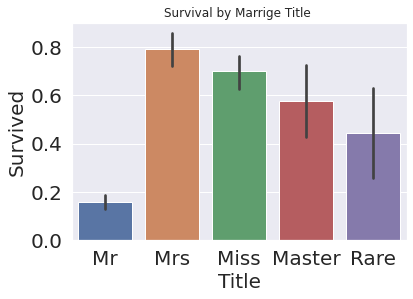

In [ ]:
# Survived relative to Marrige Title
ChildParchBarPlot = sns.barplot(x = "Title", y = "Survived", data = altered_train)
plt.title("Survival by Marrige Title ")
plt.show()

As we cans see some title names has better rates of survival then other and because of that it could be a good indication on survival.

So i will keep this feature and i will delete the feture 'Name'

I will also encode the title names

In [ ]:
altered_train = altered_train.drop(columns = "Name", axis = 1)

title_mapping = {"Rare": 1, "Mr": 2, "Master": 3, "Mrs": 4, "Miss": 5}
altered_train['Title'] = altered_train['Title'].map(title_mapping)

Now i will devide the passangers to Age 4 groups:
  
  1. **Children's(3):** Age 0-15
  2. **Young adults(2):** Age 16-25
  3. **Adults(1):** Age 26-64
  4. **Elderly(0):** Age 65 and above

In [ ]:
altered_train.loc[altered_train['Age'] <= 15, 'Age_group'] =3 
altered_train.loc[(altered_train['Age'] > 15) & (altered_train['Age'] <= 25), 'Age_group'] = 2
altered_train.loc[(altered_train['Age'] > 25) & (altered_train['Age'] <= 64), 'Age_group'] = 1
altered_train.loc[altered_train['Age'] > 64 , 'Age_group'] = 0

In [ ]:
altered_train['Age_group'].isna().any()

False

As we can see i created the age groups and made sure there are no missing values.

Now we will cheack the realtion between survived to age group.

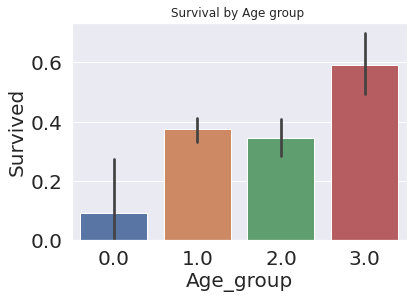

In [ ]:
# Survived relative to Age group
ChildParchBarPlot = sns.barplot(x = "Age_group", y = "Survived", data = altered_train)
plt.title("Survival by Age group ")
plt.show()

As we can see from the graph some age groups has higher rate of survival.

So i will keep age group parameters and will drop age because it wiil be better to predict survival by this feature.

In [ ]:
altered_train = altered_train.drop(columns = "Age", axis = 1)

#Conclusions from the graphs:
  
  1. Most of the survivals were women's.
  2. 1st class passangers had the highest rate of survival.
  3. The pepole with only 1 SibSp had the highest rate of survival.
  4. The pepole with 3 Parch had the highest rate of survival.
  5. Childrens (Age <= 15) with 0 Parch (in this case must be parents because they are too young for there own kids) had the highest rate of survival (i would figure it would be opposite of that).
  6. Childrens (Age <= 15) had the highest rate of survival between all age groups.
  7. Diffrent marrige titles had diffrent chances to survive (Mrs,Miss,Master are the highest 3) 


# Building the modle

First we will slice the data to train and validation.

lets cheack which % of slicing is better.

In [ ]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [ ]:
t = altered_train['Survived']
x = altered_train.drop(columns = "Survived", axis = 1)

# plot the score by split and the loss by split
def plot_score_and_loss_by_split(X, t):
    graph_points = {
                    'Train CE':{},
                    'Validation CE': {},
                    'Train Accuracy': {},
                    'Validation Accuracy': {}
                    }
    for size in range(10, 100, 10):
        xTrain, xValidation, tTrain, tValidation = model_selection.train_test_split(x, t, test_size = size / 100, random_state = 42)
        SGDClassifier = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss = "log", alpha = 0, learning_rate = "constant", eta0 = 0.01)).fit(xTrain, tTrain)
        yTrainProb = SGDClassifier.predict_proba(xTrain)
        yValidationProb = SGDClassifier.predict_proba(xValidation)
        
        # print('CE on train', metrics.log_loss(tTrain, yTrainProb))
        graph_points["Train CE"][size / 100] = metrics.log_loss(tTrain, yTrainProb)
        graph_points["Validation CE"][size / 100] = metrics.log_loss(tValidation, yValidationProb)
        graph_points["Train Accuracy"][size / 100] = SGDClassifier.score(xTrain, tTrain)
        graph_points["Validation Accuracy"][size / 100] = SGDClassifier.score(xValidation, tValidation)
    print_graphs_r2_mse(graph_points)

plot_score_and_loss_by_split(x, t)

As we can see the smaller the validatin the smaller its lost point that is best for slicing the data will be about 0.8 for train and 0.2 for validatin thats about the right point for slicing for them to be as close as possible.

In [ ]:
xTrain, xValidation, tTrain, tValidation = model_selection.train_test_split(x, t, test_size = 0.2, random_state = 42)
SGDClassifier = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss = "log", alpha = 0, learning_rate = "constant", eta0 = 0.01)).fit(xTrain, tTrain)

# Working on the Test dataset

In [ ]:
altered_test = testCSV.copy()
passangers_ids = testCSV['PassengerId'].copy()
#dropping unnecessary columns
altered_test = altered_test.drop(columns = "Cabin", axis = 1)
altered_test = altered_test.drop(columns = "PassengerId", axis = 1)
altered_test = altered_test.drop(columns = "Ticket", axis = 1)
#count na in altered dataset
count_empty_values_in_each_column(altered_test)

empty values
------------

Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Fare: 1
Embarked: 0


In [ ]:
fill_na_random_pick_column_distribution(altered_test, "Embarked")
fill_na_mean(altered_test, "Age")
fill_na_random_pick_column_distribution(altered_test, "Fare")

count_empty_values_in_each_column(altered_test)

empty values
------------

Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


In [ ]:
df_cat = altered_test[['Embarked']]
enc = OneHotEncoder(drop='first', sparse=False)
cat_enc = pd.DataFrame(enc.fit_transform(df_cat), columns=enc.get_feature_names_out())
altered_test = altered_test.drop(['Embarked'], axis=1).join(cat_enc)
altered_test['Sex'] = altered_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
altered_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",0,34.50000,0,0,7.8292,1.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,7.0000,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,9.6875,1.0,0.0
3,3,"Wirz, Mr. Albert",0,27.00000,0,0,8.6625,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,12.2875,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,30.27259,0,0,8.0500,0.0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,108.9000,0.0,0.0
415,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,7.2500,0.0,1.0
416,3,"Ware, Mr. Frederick",0,30.27259,0,0,8.0500,0.0,1.0


In [ ]:
## didnt use because it mad to score worse
#combaining Parch and SibSp to Family
#altered_test['Family'] = altered_test['Parch'] + altered_test['SibSp']
#altered_test = altered_test.drop(['Parch', 'SibSp'], axis=1)

In [ ]:
#extracting marrige titles
altered_test['Title'] = altered_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)#extract title name
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme']
altered_test['Title'] = altered_test['Title'].replace(rare_titles, 'Rare') 
altered_test = altered_test.drop(columns = "Name", axis = 1)
title_mapping = {"Rare": 1, "Mr": 2, "Master": 3, "Mrs": 4, "Miss": 5}
altered_test['Title'] = altered_test['Title'].map(title_mapping)

In [ ]:
#spliting to age group
altered_test.loc[altered_test['Age'] <= 15, 'Age_group'] =3 
altered_test.loc[(altered_test['Age'] > 15) & (altered_test['Age'] <= 25), 'Age_group'] = 2
altered_test.loc[(altered_test['Age'] > 25) & (altered_test['Age'] <= 64), 'Age_group'] = 1
altered_test.loc[altered_test['Age'] > 64 , 'Age_group'] = 0
altered_test = altered_test.drop(columns = "Age", axis = 1)

In [ ]:
altered_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title,Age_group
0,3,0,0,0,7.8292,1.0,0.0,2,1.0
1,3,1,1,0,7.0000,0.0,1.0,4,1.0
2,2,0,0,0,9.6875,1.0,0.0,2,1.0
3,3,0,0,0,8.6625,0.0,1.0,2,1.0
4,3,1,1,1,12.2875,0.0,1.0,4,2.0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,8.0500,0.0,1.0,2,1.0
414,1,1,0,0,108.9000,0.0,0.0,1,1.0
415,3,0,0,0,7.2500,0.0,1.0,2,1.0
416,3,0,0,0,8.0500,0.0,1.0,2,1.0


# Submission

In [ ]:
yTest = SGDClassifier.predict(altered_test)

submission = pd.DataFrame()
submission['PassengerId'] = passangers_ids
submission['Survived'] = yTest

submission.to_csv('Submission.csv', index=False)

The fallowing pictures are of some of my submissions:
1. This submissin is the best and inclueds the fallowing features: Pcalss, Sex, Parch, SibSp, Fare, Embaked, Title, Age_group

2. This submmisin included this features:Pcalss, Sex, Family, Fare, Embaked, Title, Age_group

3. This submmisin included this features:Pcalss, Sex, Family, Fare, Embaked, Age_group


# 1. **Best Submission**

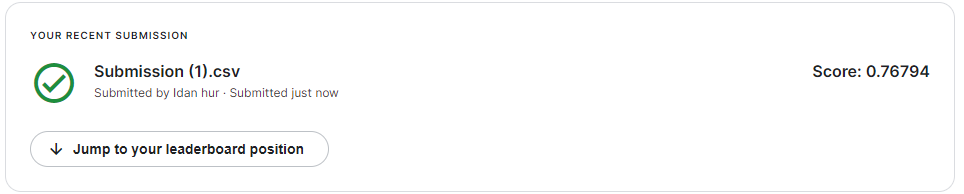

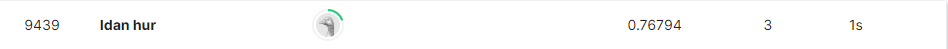

# 2.

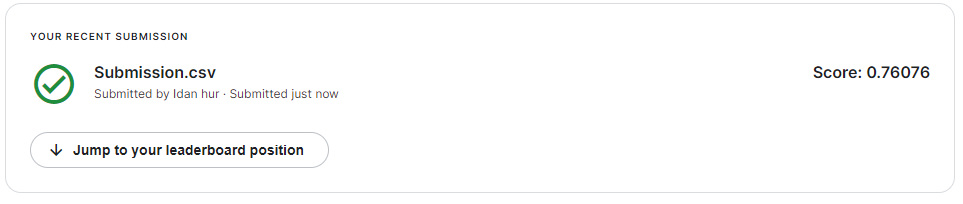

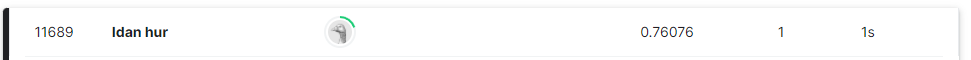

# 3

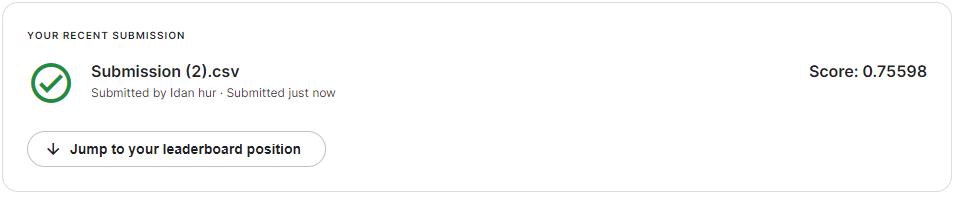

# Summary
In this homework i tried to solve the titanic problam.
I droped features that i think is unnecessary for predicting the survival, such as: name, cabin, ticket and passengers ids.

I analayzed the data and tried to find new features that will help me better predict the survival.

I had found that diffrent marrige title names had diffrent rate of survival so i decidad to add this feature, also i had found that diffrent age groups had diffrent rate of survival so it was also a good indicatin.

After analyzing the data and adding the new features i tried to find the bext slicing of the train data to train and validation and decided on a 80/20 split.

Then i set up an SGD Classifier and predicted the survival rate of the test data and submitted it.



# references

1. Fourth Practice ML notebook
2. Fifth Practice ML notebook
3. Third Practice ML notebook
4. Titanic Data Science Solutions - https://www.kaggle.com/code/startupsci/titanic-data-science-solutions